In [1]:
!pip install kagglehub

DEPRECATION: Loading egg at c:\users\hp\appdata\local\programs\python\python311\lib\site-packages\mcqgenerator-0.0.1-py3.11.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
    pytz>=2011n
        ~~~~~~^

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gauravtopre/bank-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1


In [4]:
import os

for paths in os.listdir(r'C:\Users\Hp\.cache\kagglehub\datasets\gauravtopre\bank-customer-churn-dataset\versions\1'):
    print(paths)
    break


Bank Customer Churn Prediction.csv


In [8]:
import pandas as pd

df=pd.read_csv(r'C:/Users/Hp/.cache/kagglehub/datasets/gauravtopre/bank-customer-churn-dataset/versions/1/Bank Customer Churn Prediction.csv')
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
import pandas as pd
import yaml

# Load config.yaml
with open('../config/config.yaml', 'r') as f:
    config = yaml.safe_load(f)

print(config)

raw_data_path = config['raw_data_path']

df = pd.read_csv(raw_data_path)

In [9]:
import pandas as pd
df=pd.read_csv(r'../data/raw/churn.csv')

In [10]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# drop customer_id
df=df.drop(columns='customer_id')

In [12]:
df.shape

(10000, 11)

In [13]:
# check for missing values
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
# check for column dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [16]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


 ### Univariate Analysis

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as

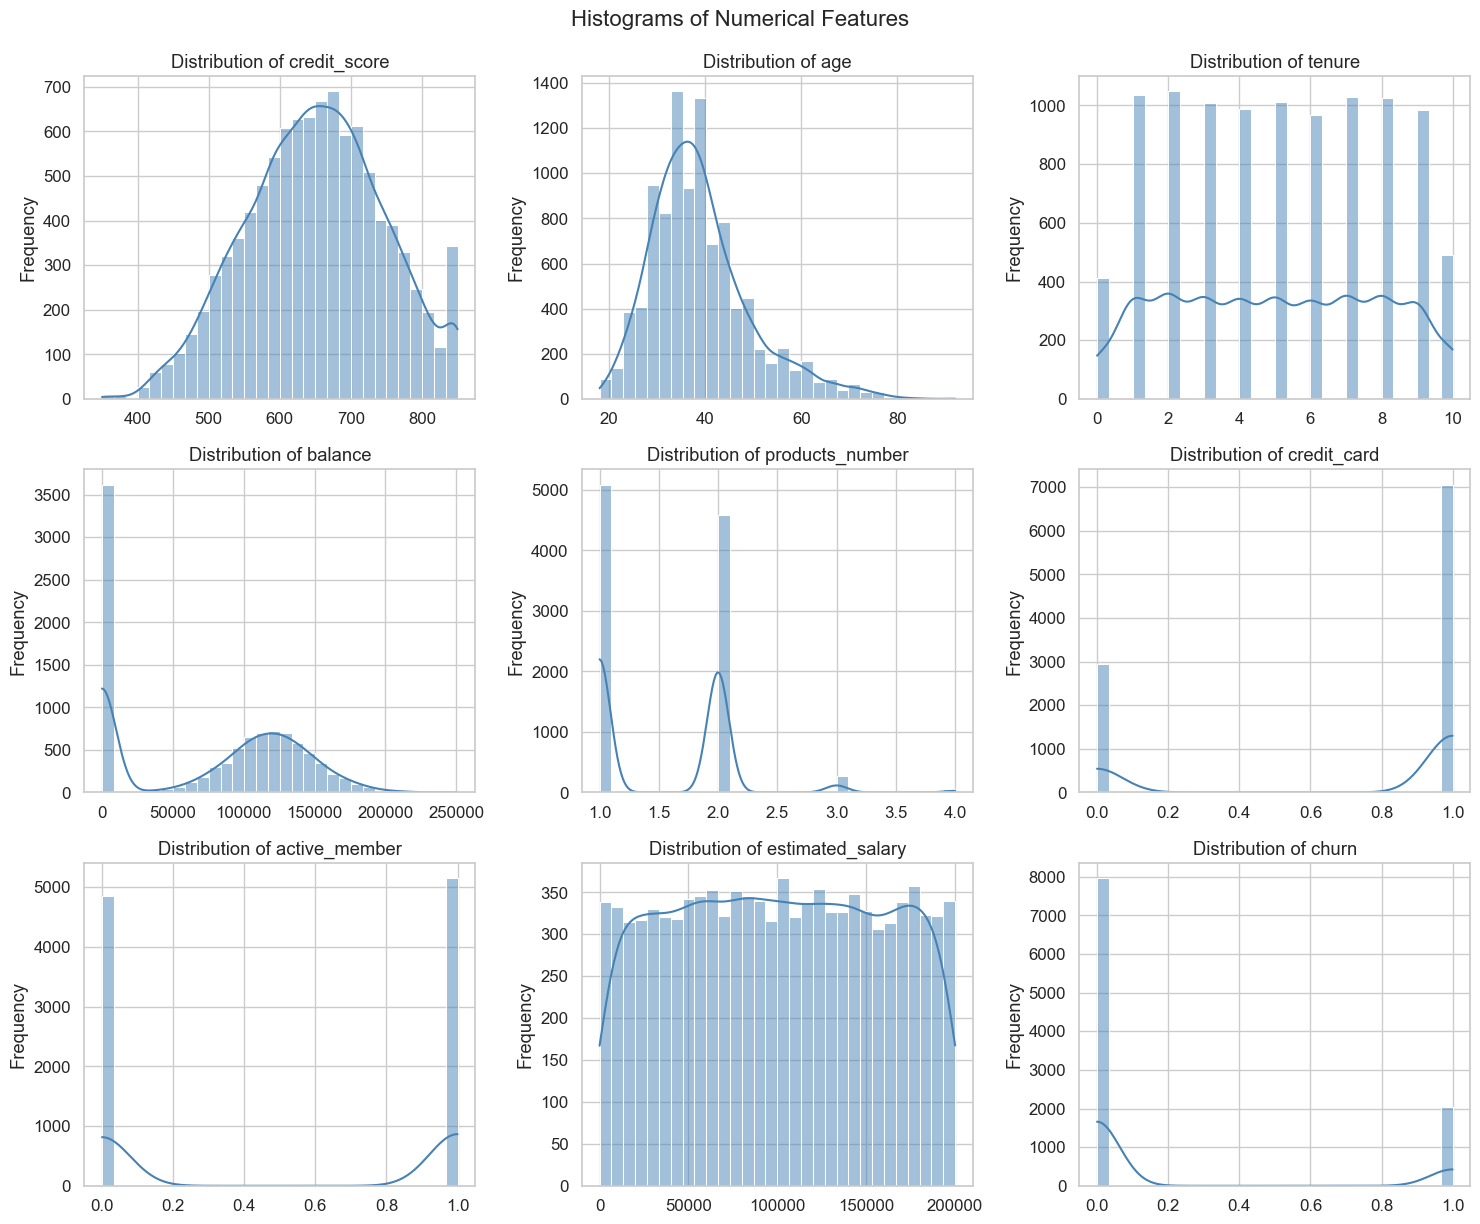

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numerical_df=df.select_dtypes(include=np.number)
# drop customer id column
#numerical_df=numercial_df.drop(columns='customer_id')

# Optional: for better visuals
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Assuming df is your DataFrame
numerical_cols = numerical_df.columns

# Set up the plot grid (3x3 for 9 features)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # flatten the grid to 1D array for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, kde=True, bins=30, ax=axes[i], color='steelblue')
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")

# Turn off empty subplots (if any)
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()



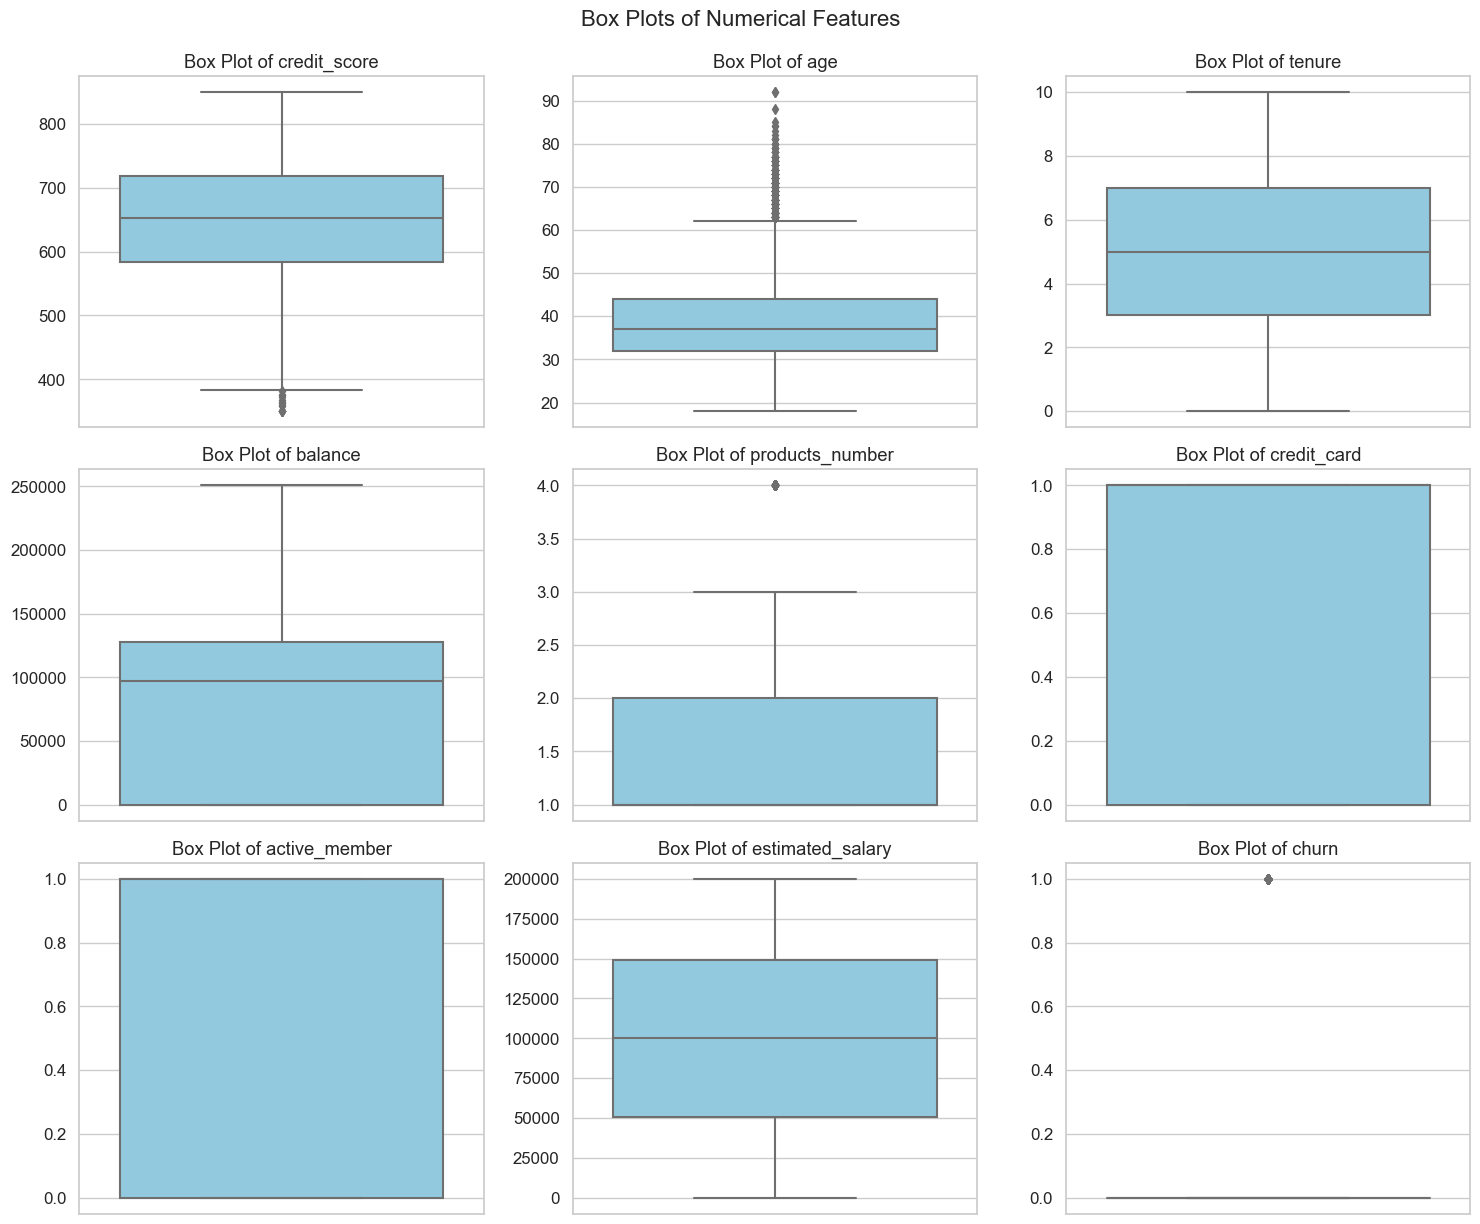

In [19]:
### Box Plot (Outlier Detection)

import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for elegance
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Select 9 numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns[:9]

# Create 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='skyblue')
    axes[i].set_title(f"Box Plot of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Turn off any unused axes
for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.suptitle("Box Plots of Numerical Features", fontsize=16, y=1.02)
plt.show()


### Categorical Variables Inspection

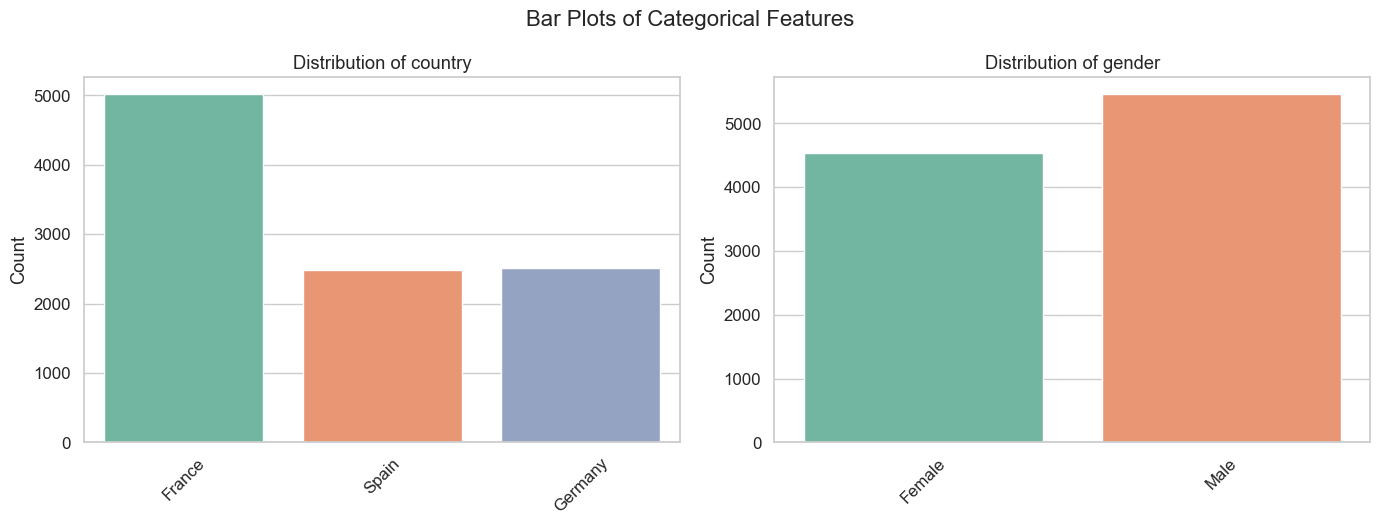

In [20]:
categorical_df=df.select_dtypes(exclude=np.number)
categorical_cols=categorical_df.columns

# Pick the first two categorical columns
cat_cols = categorical_df.columns

# Set seaborn style
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# Create subplot layout
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for i, col in enumerate(cat_cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette="Set2")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    for label in axes[i].get_xticklabels():
        label.set_rotation(45)  # Rotate labels if needed

plt.tight_layout()
plt.suptitle("Bar Plots of Categorical Features", fontsize=16, y=1.05)
plt.show()



### Check for class imbalance

<Axes: xlabel='churn'>

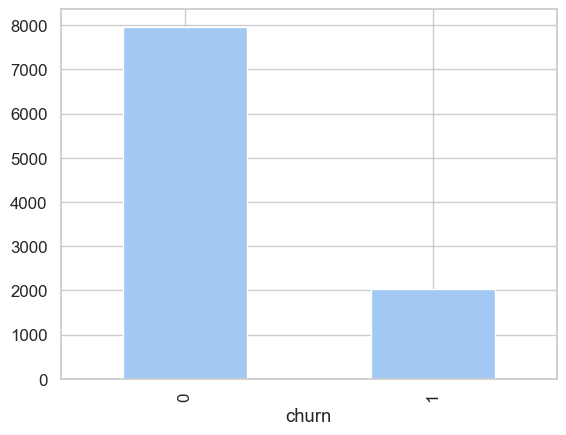

In [21]:
## check for imbalance
df['churn'].value_counts().plot.bar()

### Handle class imbalance

In [22]:
from imblearn.under_sampling import RandomUnderSampler

X_train=df.drop(columns='churn')
y_train=df['churn']

In [23]:
ros=RandomUnderSampler(random_state=42)
X_resampled,y_resampled=ros.fit_resample(X_train,y_train)

### preprocessor 

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

cat_cols = ['country','gender']
        
cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ])
        
preprocessor = ColumnTransformer(
    transformers=[
                ('cat', cat_pipeline, cat_cols)
            ],
            remainder='passthrough'  # Keep numerical features
        )

In [25]:
X_preprocessed=preprocessor.fit_transform(X_resampled)
ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
ohe_feature_names = ohe.get_feature_names_out(cat_cols)

num_cols = [col for col in X_resampled.columns if col not in cat_cols]
all_columns = list(ohe_feature_names) + num_cols

X_df = pd.DataFrame(X_preprocessed, columns=all_columns)

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
X_df.shape

(4074, 13)

In [27]:
y_resampled.shape

(4074,)

In [28]:
val_df=pd.read_csv(r'../data/validation/val.csv')

In [29]:
val_df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15586757,801,France,Female,32,4,75170.54,1,1,1,37898.50,0
1,15770711,766,Germany,Female,28,4,90696.78,1,0,1,21597.20,0
2,15567993,828,Spain,Male,28,8,134766.85,1,1,0,79355.87,0
3,15729377,798,France,Male,36,1,0.00,2,1,1,159044.10,0
4,15640627,611,Spain,Male,34,4,0.00,2,1,0,170950.58,0


In [30]:
# drop customer_id
val_df=val_df.drop(columns='customer_id')
val_df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,801,France,Female,32,4,75170.54,1,1,1,37898.50,0
1,766,Germany,Female,28,4,90696.78,1,0,1,21597.20,0
2,828,Spain,Male,28,8,134766.85,1,1,0,79355.87,0
3,798,France,Male,36,1,0.00,2,1,1,159044.10,0
4,611,Spain,Male,34,4,0.00,2,1,0,170950.58,0


In [31]:
## split
val_df_X=val_df.drop(columns='churn')
val_df_y=val_df['churn']

#preprocess
val_df_X_pre=preprocessor.transform(val_df_X)
# comvert to df
val_df_X_pre=pd.DataFrame(val_df_X_pre,columns=all_columns)

### Model Building

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np

def model_train(model, X_train, y_train, X_val, y_val):
    """
    Trains the given model and prints evaluation metrics.
    
    Args:
        model: A scikit-learn model instance.
        X_train: Training feature matrix.
        y_train: Training labels.
        X_val: Validation feature matrix.
        y_val: Validation labels.
    """
    print(f"\n🔧 Training model: {model.__class__.__name__}...")
    
    model.fit(X_train, y_train)
    print("✅ Training complete. Evaluating on validation data...")
    
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred)
    rec = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_prob) if y_prob is not None else "N/A"

    print("\n📊 Evaluation Metrics:")
    print(f"Accuracy     : {acc:.4f}")
    print(f"Precision    : {prec:.4f}")
    print(f"Recall       : {rec:.4f}")
    print(f"F1 Score     : {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc if roc_auc == 'N/A' else round(roc_auc, 4)}")

    print("\n📋 Classification Report:")
    print(classification_report(y_val, y_pred))

    print("🧾 Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    

In [33]:
from sklearn.ensemble import (
    RandomForestClassifier,
    ExtraTreesClassifier,
    HistGradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Instantiate models with silent options
models = [
    RandomForestClassifier(n_estimators=100, random_state=42),
    ExtraTreesClassifier(n_estimators=100, random_state=42),
    HistGradientBoostingClassifier(max_iter=100, random_state=42),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0, random_state=42),
    LGBMClassifier(verbosity=-1, random_state=42)
]


In [34]:
for model in models:
    model_train(model, X_df, y_resampled, val_df_X_pre, val_df_y)



🔧 Training model: RandomForestClassifier...
✅ Training complete. Evaluating on validation data...

📊 Evaluation Metrics:
Accuracy     : 0.8825
Precision    : 0.6350
Recall       : 1.0000
F1 Score     : 0.7767
ROC AUC Score: 0.9837

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1273
           1       0.63      1.00      0.78       327

    accuracy                           0.88      1600
   macro avg       0.82      0.93      0.85      1600
weighted avg       0.93      0.88      0.89      1600

🧾 Confusion Matrix:
[[1085  188]
 [   0  327]]

🔧 Training model: ExtraTreesClassifier...
✅ Training complete. Evaluating on validation data...

📊 Evaluation Metrics:
Accuracy     : 0.8725
Precision    : 0.6158
Recall       : 1.0000
F1 Score     : 0.7622
ROC AUC Score: 1.0

📋 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.84      0.91      1273
      

In [37]:
from sklearn.model_selection import GridSearchCV

def tune_random_forest(X_train, y_train, X_val=None, y_val=None, cv=5, scoring='f1'):
    """
    Performs hyperparameter tuning on RandomForestClassifier using GridSearchCV.

    Args:
        X_train: Training features (DataFrame)
        y_train: Training labels (Series)
        X_val: Optional validation features
        y_val: Optional validation labels
        cv: Cross-validation folds
        scoring: Scoring metric (default: 'f1')

    Returns:
        best_model: Trained model with best parameters
    """
    param_grid = {
    'n_estimators':[100,200,300]
    }

    rf = RandomForestClassifier(random_state=42)

    grid_search = GridSearchCV(
        estimator=rf,
        param_grid=param_grid,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    print(f"\n✅ Best Parameters: {grid_search.best_params_}")
    print(f"📊 Best {scoring} Score (CV): {grid_search.best_score_:.4f}")

    if X_val is not None and y_val is not None:
        print("\n🔍 Evaluation on Validation Set:")
        y_pred = best_model.predict(X_val)
        print(classification_report(y_val, y_pred))
        print("🧾 Confusion Matrix:")
        print(confusion_matrix(y_val, y_pred))

    return best_model

In [38]:
best_rf = tune_random_forest(X_df, y_resampled, val_df_X_pre, val_df_y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits

✅ Best Parameters: {'n_estimators': 100}
📊 Best f1 Score (CV): 0.7583

🔍 Evaluation on Validation Set:
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1273
           1       0.63      1.00      0.78       327

    accuracy                           0.88      1600
   macro avg       0.82      0.93      0.85      1600
weighted avg       0.93      0.88      0.89      1600

🧾 Confusion Matrix:
[[1085  188]
 [   0  327]]


### Feature Importance

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_feature_importance(model, feature_names, top_n=20):
    """
    Plots top N feature importances from a fitted RandomForestClassifier.

    Args:
        model: Trained RandomForestClassifier model.
        feature_names: List of feature names after preprocessing (one-hot included).
        top_n: Number of top features to display.
    """
    importances = model.feature_importances_
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    # Sort by importance
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(top_n)

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][::-1], feature_importance_df['Importance'][::-1], color='skyblue')
    plt.xlabel("Feature Importance")
    plt.title(f"Top {top_n} Important Features")
    plt.tight_layout()
    plt.show()


In [40]:
def get_feature_names(preprocessor):
    cat_cols = preprocessor.transformers_[0][2]
    cat_ohe = preprocessor.transformers_[0][1].named_steps['onehot']
    cat_names = cat_ohe.get_feature_names_out(cat_cols)

    remainder = preprocessor.transformers_[-1]
    if remainder == 'passthrough':
        num_cols = [col for col in range(len(cat_cols), preprocessor._n_features_out)]
    else:
        num_cols = []  # If no passthrough, update accordingly

    return list(cat_names) + [f'num_{i}' for i in range(len(num_cols))]


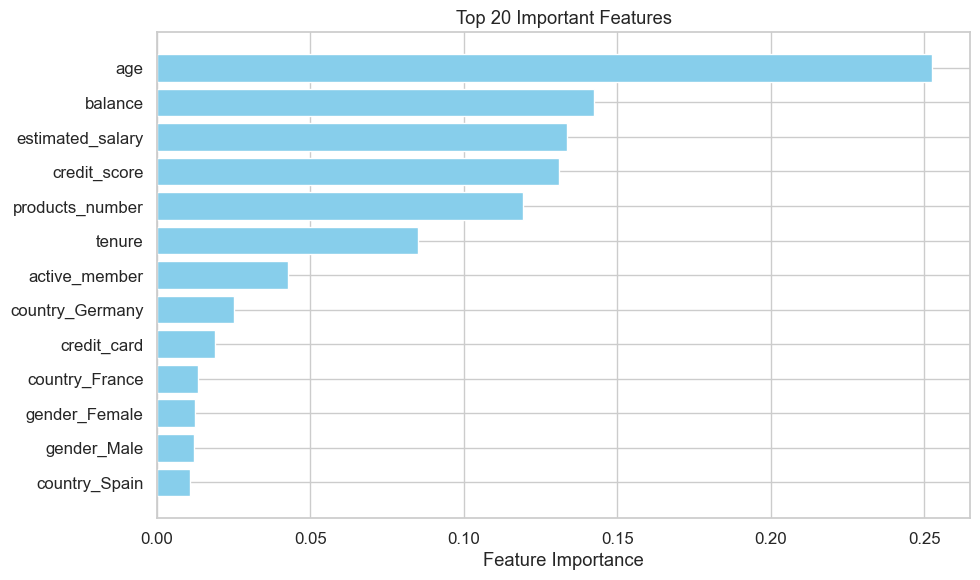

In [41]:
plot_feature_importance(best_rf, feature_names=X_df.columns)